In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import tqdm
import numpy as np

In [ ]:
def download_data():
    """Download the MNIST dataset and create a data loader."""
    # MNIST training set
    mnist_train = torchvision.datasets.MNIST(
        root="./dataset",
        train=True,
        download=True,
        transform=torchvision.transforms.ToTensor()
    )
    # MNIST test set
    mnist_test = torchvision.datasets.MNIST(
        root="./dataset",
        train=False,
        download=True,
        transform=torchvision.transforms.ToTensor()
    )
    return mnist_train, mnist_test

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./dataset
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./dataset
    Split: Test
    StandardTransform
Transform: ToTensor()
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
tensor([7, 2, 1,  ..., 4, 5, 6])
torch.Size([28, 28])


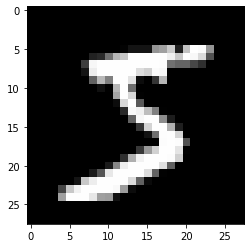

In [ ]:
batch_size = 64
mnist_train, mnist_test = download_data()
print(mnist_train)
print(mnist_test)

print(mnist_train.classes)
print(mnist_test.targets)

# visualize first image
print(mnist_train[0][0][0].shape)
plt.imshow(mnist_train[0][0][0], cmap='Greys_r')

In [ ]:
train_loader = torch.utils.data.DataLoader(
    mnist_train, batch_size=batch_size, drop_last=True, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    mnist_test, batch_size=batch_size, drop_last=True, shuffle=True
)

for images, labels in train_loader:
    print(images.shape, labels.shape)
    break
    
# num minibatches 
print(len(train_loader))

torch.Size([64, 1, 28, 28]) torch.Size([64])
937


In [ ]:
class Generator(torch.nn.Module):
    def __init__(self, image_shape, hidden_dim):
        super().__init__()
        self.hidden0 = torch.nn.Sequential(torch.nn.Linear(image_shape, hidden_dim), torch.nn.LeakyReLU(0.2))
        self.hidden1 = torch.nn.Sequential(torch.nn.Linear(hidden_dim, hidden_dim * 2), torch.nn.LeakyReLU(0.2))
        self.hidden2 = torch.nn.Sequential(torch.nn.Linear(hidden_dim * 2, hidden_dim * 4), torch.nn.LeakyReLU(0.2))
        self.tanh = torch.nn.Tanh()
        self.out = torch.nn.Linear(hidden_dim * 4, image_shape)
        
    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        return self.tanh(self.out(x))

In [ ]:
# Critic class is similar to Discriminator. Instead of classifying 'real' or 'fake', scores how real the image looks
class Critic(torch.nn.Module):
  def __init__(self, image_shape, hidden_dim):
      super().__init__()
      self.hidden0 = torch.nn.Sequential(torch.nn.Linear(image_shape, hidden_dim * 4), torch.nn.LeakyReLU(0.2), torch.nn.Dropout(0.3))
      self.hidden1 = torch.nn.Sequential(torch.nn.Linear(hidden_dim * 4, hidden_dim * 2), torch.nn.LeakyReLU(0.2), torch.nn.Dropout(0.3))
      self.hidden2 = torch.nn.Sequential(torch.nn.Linear(hidden_dim * 2, hidden_dim), torch.nn.LeakyReLU(0.2), torch.nn.Dropout(0.3))
      self.out = torch.nn.Sequential(torch.nn.Linear(hidden_dim, 1))    # end with linear activation for Critic
      
  def forward(self, x):
      x = self.hidden0(x)
      x = self.hidden1(x)
      x = self.hidden2(x)
      return self.out(x)


In [ ]:
image_shape, hidden_dim = 28 * 28, 128

In [ ]:
generator = Generator(image_shape, hidden_dim)
critic = Critic(image_shape, hidden_dim)

# use RMSprop optimizer for both generator and critic in WGAN
g_optim, c_optim = torch.optim.RMSprop(
    generator.parameters(), lr=2e-4
), torch.optim.RMSprop(
    critic.parameters(), lr=2e-4
)

In [ ]:
def generate_fake_samples(generator):
    latents = torch.randn(batch_size, image_shape)
    fake_samples = generator(latents)
    return fake_samples

In [ ]:
def display_fake_samples(generated_images):
    fig = plt.figure(figsize = (8, 8))
    columns, rows = 8, 8
    for i in range(1, columns * rows + 1):
        img = torch.unsqueeze(generated_images[i - 1], dim=0).view((28, 28))
        fig.add_subplot(rows, columns, i)
        plt.imshow(img, cmap='Greys_r')
    plt.show()

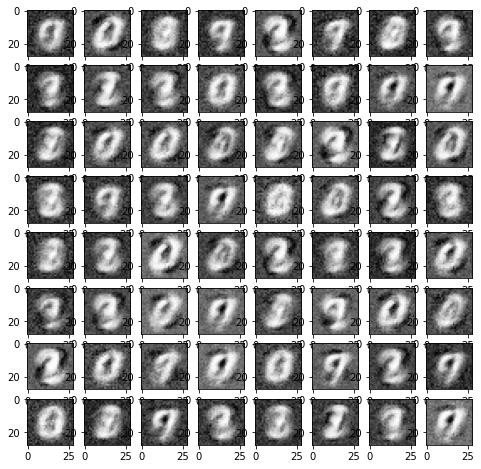

Epoch:  0
Critic Loss:  -0.23482588
Epoch:  0
Critic Loss:  -0.27485296
Epoch:  0
Critic Loss:  -0.3442211
Epoch:  0
Critic Loss:  -0.30884123
Epoch:  0
Critic Loss:  -0.35490865
Generator Real Loss:  0.029242007


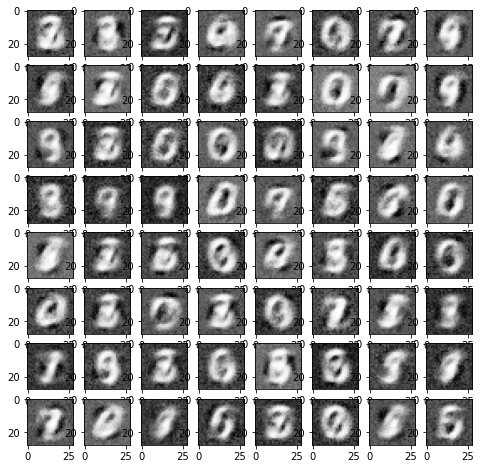

Epoch:  0
Critic Loss:  -0.19273385
Epoch:  0
Critic Loss:  -0.2640461
Epoch:  0
Critic Loss:  -0.2813537
Epoch:  0
Critic Loss:  -0.31399322
Epoch:  0
Critic Loss:  -0.31773096
Generator Real Loss:  -0.0005519402


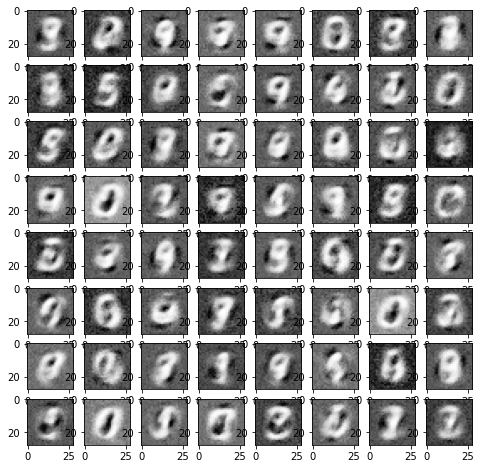

Epoch:  0
Critic Loss:  -0.25024718
Epoch:  0
Critic Loss:  -0.26608056
Epoch:  0
Critic Loss:  -0.2743683
Epoch:  0
Critic Loss:  -0.2818501
Epoch:  0
Critic Loss:  -0.32060957
Generator Real Loss:  0.20086944


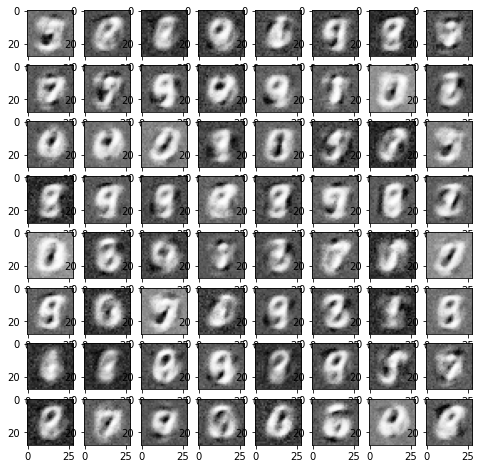

Epoch:  0
Critic Loss:  -0.17419025
Epoch:  0
Critic Loss:  -0.1862371
Epoch:  0
Critic Loss:  -0.2782695
Epoch:  0
Critic Loss:  -0.23562685
Epoch:  0
Critic Loss:  -0.29336876
Generator Real Loss:  0.28733915


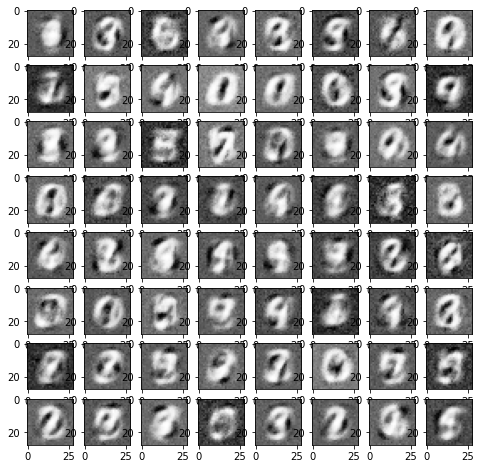

Epoch:  1
Critic Loss:  -0.18848723
Epoch:  1
Critic Loss:  -0.21003383
Epoch:  1
Critic Loss:  -0.2558815
Epoch:  1
Critic Loss:  -0.26542902
Epoch:  1
Critic Loss:  -0.25769073
Generator Real Loss:  0.14181915


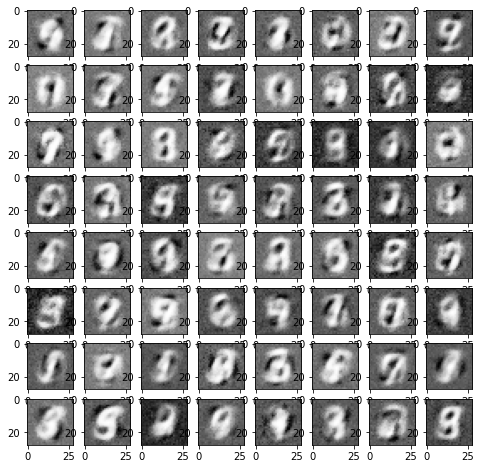

Epoch:  1
Critic Loss:  -0.1740722
Epoch:  1
Critic Loss:  -0.18182316
Epoch:  1
Critic Loss:  -0.2643352
Epoch:  1
Critic Loss:  -0.22969192
Epoch:  1
Critic Loss:  -0.3441009
Generator Real Loss:  -0.10899489


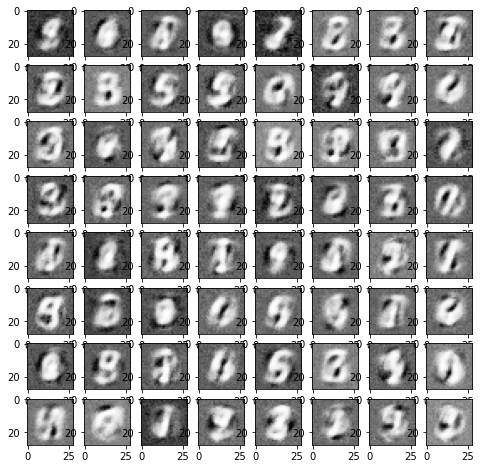

Epoch:  1
Critic Loss:  -0.19898638
Epoch:  1
Critic Loss:  -0.22763683
Epoch:  1
Critic Loss:  -0.2580277
Epoch:  1
Critic Loss:  -0.24865516
Epoch:  1
Critic Loss:  -0.28860754
Generator Real Loss:  0.1968


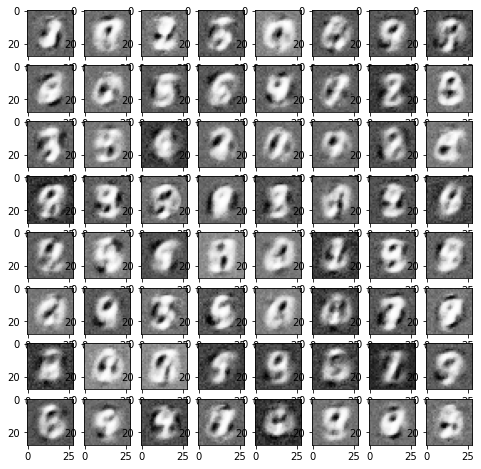

Epoch:  1
Critic Loss:  -0.13857368
Epoch:  1
Critic Loss:  -0.1402719
Epoch:  1
Critic Loss:  -0.23015212
Epoch:  1
Critic Loss:  -0.2167677
Epoch:  1
Critic Loss:  -0.25051433
Generator Real Loss:  0.0949911


KeyboardInterrupt: ignored

In [ ]:
def train_wgan(train_loader, generator, critic, c_optim, g_optim, num_epochs=30):
    g_losses = []
    c_losses = []
    ncritic = 5

    for epoch in range(num_epochs):
        cnt = 0
        for images, labels in train_loader:
            cnt += 1
            real_samples = torch.flatten(images, start_dim=1)
            fake_samples = generate_fake_samples(generator)
            # display fake samples
            if cnt % 200 == 0:
                display_fake_samples(fake_samples.detach())

            # train critic 'ncritic' times more than you train the generator
            for _ in range(ncritic):
              real_samples = torch.flatten(images, start_dim=1)
              fake_samples = generate_fake_samples(generator)

              # calculate critic loss
              c_optim.zero_grad()
              c_real = critic(real_samples)
              c_fake = critic(fake_samples)
              c_loss = -(torch.mean(c_real) - torch.mean(c_fake))

              if cnt % 200 == 0:
                print("Epoch: ", epoch)
                print("Critic Loss: ", c_loss.data.numpy())

              c_loss.backward()
              c_optim.step()

              # limit range of parameters to (-0.01, 0.01)
              for p in critic.parameters():
                p.data.clamp_(-0.01, 0.01)

            real_samples = torch.flatten(images, start_dim=1)
            fake_samples = generate_fake_samples(generator)

            # calculate generator loss
            g_optim.zero_grad()
            g_loss = -torch.mean(critic(fake_samples))
            if cnt % 200 == 0:
                print("Generator Real Loss: ", g_loss.data.numpy())
            # backprop gradients, update weights
            g_loss.backward()
            g_optim.step()
        
        c_losses.append(c_loss.item())
        g_losses.append(g_loss.item())

    # plot losses for critic and generator
    plt.subplot(2, 1, 1)
    plt.plot(c_losses)
    plt.title('Critic Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(g_losses)
    plt.title('Generator Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

    
    
train_wgan(train_loader, generator, critic, c_optim, g_optim)